# Sections around the ACC

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.path import Path
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [21]:
reload(ef);

The goal of this notebook is to take multiple sections in the Southern Ocean to see if this variance minimum appears anywhere else. I'd also like to try doing one huge section from the Southern Ocean to the North Atlantic if possible.

# Section Selection

In [72]:
box1 = [0,2,-70,0,0,2000]
box2 = [60,62,-70,20,0,2000]
box3 = [90,92,-70,15,0,2000]
box4 = [130,132,-70,-35,0,2000]
box5 = [-180,-178,-70,70,0,2000]
box6 = [-130,-128,-70,50,0,2000]
box7 = [-50,-48,-70,-35,0,2000]
box8 = [-25,-23,-70,70,0,2000]
boxes= [box1, box2, box3, box4, box5, box6, box7, box8]

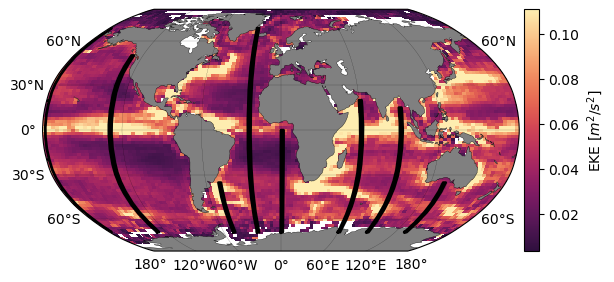

In [73]:
pf.plot_box(boxes)

In [30]:
sect1     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(0,2)_lat:(-70,0)_ds_z.nc')
sect1_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(0,2)_lat:(-70,0)_ls:[50,100,200]_SPICE.nc')

In [49]:
sect2     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(60,62)_lat:(-70,20)_ds_z.nc')
sect2_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(60,62)_lat:(-70,20)_ls:[50,100,200]_SPICE.nc')

In [52]:
sect3     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(90,92)_lat:(-70,15)_ds_z.nc')
sect3_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(90,92)_lat:(-70,15)_ls:[50,100,200]_SPICE.nc')

In [59]:
sect4     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(130,132)_lat:(-70,-35)_ds_z.nc')
sect4_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(130,132)_lat:(-70,-35)_ls:[50,100,200]_SPICE.nc')

In [95]:
sect5     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-178)_lat:(-70,70)_ds_z.nc')
sect5_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(-180,-178)_lat:(-70,70)_ls:[50,100,200]_SPICE.nc')

In [83]:
sect6     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-130,-128)_lat:(-70,50)_ds_z.nc')
sect6_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(-130,-128)_lat:(-70,50)_ls:[50,100,200]_SPICE.nc')

In [96]:
sect7     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-50,-48)_lat:(-70,-35)_ds_z.nc')
sect7_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(-50,-48)_lat:(-70,-35)_ls:[50,100,200]_SPICE.nc')

In [ ]:
sect8     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(335,337)_lat:(-70,70)_ds_z.nc')
sect8_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(335,337)_lat:(-70,70)_ls:[50,100,200]_SPICE.nc')

In [84]:
sect8 = prf.get_box(box8)

loading points complete


/home/amf2288/mambaforge-pypy3/envs/argo_Aug_23/lib/python3.10/site-packages/argopy/data_fetchers/gdacftp_data.py:316: UserWarning: Found more than 50 files to load, this may take a while to process sequentially ! Consider using another data source (eg: 'erddap') or the 'parallel=True' option to improve processing time.
  warnings.warn(
100%|██████████| 646/646 [23:42<00:00,  2.20s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete
adding MLD complete


In [85]:
sect8 = sect8.assign_attrs({"Fetched_uri":''})
sect8

<xarray.Dataset>
Dimensions:            (N_PROF: 894, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF             (N_PROF) int64 663 664 675 676 ... 1506 2871 1507 2498
    TIME               (N_PROF) datetime64[ns] 2003-01-25T02:56:53 ... 2023-0...
    LATITUDE           (N_PROF) float64 -55.72 -60.41 -58.01 ... -49.19 -53.45
    LONGITUDE          (N_PROF) float64 -48.81 -48.32 -48.7 ... -49.04 -48.19
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    N_PROF_NEW         (N_PROF) int64 0 1 2 3 4 5 6 ... 888 889 890 891 892 893
    MLD                (N_PROF) int64 38 70 52 58 138 18 ... 102 36 108 114 98
    month              (N_PROF) int64 1 3 4 4 6 6 7 8 6 7 ... 5 6 6 6 6 6 7 7 7
    month_frac         (N_PROF) float64 1.81 3.344 4.622 ... 7.27 7.914 7.953
    year               (N_PROF) int64 2003 2003 2003 2003 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.003e+03 2.003e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 4.733 4.733 ... 1.427
    CYCLE_NUMBER       (N_PROF) int64 1 5 10 11 15 16 5 ... 14 89 88 159 91 171
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'R' 'A' 'A'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 3900088 3900089 ... 3901567 5905783
    PRES               (N_PROF, PRES_INTERPOLATED) float32 4.6 4.6 ... 1.998e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 33.93 33.93 ... 34.71
    SA                 (N_PROF, PRES_INTERPOLATED) float64 34.09 34.09 ... 34.88
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 26.86 26.86 ... 27.79
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 4.727 4.727 ... 1.557
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 4.7 4.7 ... 2.0 2.0
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 -0.317 ... -0.09751
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/24
    Fetched_constraints:  [x=-50.00/-48.00; y=-70.00/-35.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [86]:
sect8.to_netcdf('/swot/SUM05/amf2288/sync-boxes/lon:({},{})_lat:({},{})_ds_z.nc'.format(box8[0],box8[1],box8[2],box8[3]))

In [11]:
scales     = [50,100,200]
sample_max = 6
variable   = 'SPICE'

In [87]:
sect8_EKE = ef.get_EKE_da(sect8,scales,sample_max,variable)

In [88]:
sect8_EKE

<xarray.DataArray (EKE: 3, N_PROF: 475, PRES_INTERPOLATED: 1000)>
array([[[ 5.57268764e-02,  6.51570318e-02,  7.43739854e-02, ...,
          1.09246658e-06,  8.45632156e-07,  6.58867573e-07],
        [ 2.51168926e-03,  2.84096734e-03,  3.15133312e-03, ...,
          4.79604308e-07,  4.07612660e-07,  3.46973490e-07],
        [ 2.48778221e-02,  2.74137800e-02,  2.96890087e-02, ...,
          1.58288279e-05,  1.41428729e-05,  1.25648788e-05],
        ...,
        [ 6.59803629e-07,  7.41586352e-07,  8.16751353e-07, ...,
          1.88940092e-06,  1.68423418e-06,  1.48474222e-06],
        [ 9.94901907e-06,  1.17089330e-05,  1.34925686e-05, ...,
          9.25032307e-08,  8.22235062e-08,  7.16617463e-08],
        [ 1.88373263e-07,  1.99422022e-07,  2.06628937e-07, ...,
          2.67006090e-07,  2.21074094e-07,  1.81229593e-07]],

       [[ 2.27482901e-02,  1.60054569e-02,  9.05286506e-03, ...,
          1.35895155e-05,  1.20066616e-05,  1.05477211e-05],
        [ 2.74140994e-03,  3.00979872e-03,  3.36801681e-03, ...,
          1.24419663e-05,  1.05401703e-05,  8.89229703e-06],
        [-3.28949541e-03, -5.08185390e-03, -6.67428451e-03, ...,
          6.76186946e-05,  6.23643493e-05,  5.73058632e-05],
...
        [ 2.31755998e-07,  3.11555822e-07,  4.98379758e-07, ...,
          4.71244811e-06,  4.45744695e-06,  4.20466713e-06],
        [ 6.18145168e-06,  5.02216347e-06,  3.76826265e-06, ...,
          5.79556530e-08,  5.66960235e-08,  5.80402235e-08],
        [ 1.02003485e-07,  1.29784140e-07,  1.80722977e-07, ...,
          1.20189109e-06,  1.12217150e-06,  1.04185006e-06]],

       [[-9.62240553e-04, -2.50550556e-03, -3.65715354e-03, ...,
          6.68311515e-05,  6.48729418e-05,  6.28163376e-05],
        [ 7.56940455e-02,  8.03078659e-02,  8.50870723e-02, ...,
          1.02538946e-04,  9.86315945e-05,  9.46324183e-05],
        [-5.80752895e-03, -6.19846130e-03, -6.52383055e-03, ...,
          2.05377335e-04,  2.02176204e-04,  1.98714361e-04],
        ...,
        [ 8.84264684e-04,  9.70349220e-04,  1.06357643e-03, ...,
          1.14592713e-05,  1.13477965e-05,  1.12288490e-05],
        [ 2.27998483e-04,  2.48300545e-04,  2.70230101e-04, ...,
          1.15711002e-05,  1.07064557e-05,  9.89295955e-06],
        [ 4.43747807e-04,  4.84866349e-04,  5.29179197e-04, ...,
          3.65738760e-06,  3.59805916e-06,  3.53448880e-06]]])
Coordinates:
  * N_PROF             (N_PROF) int64 384 385 386 387 ... 1506 2871 1507 2498
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    LATITUDE           (N_PROF) float64 -41.17 -38.54 -36.86 ... -49.19 -53.45
    LONGITUDE          (N_PROF) float64 -49.19 -49.7 -48.82 ... -49.04 -48.19
    MLD                (N_PROF) int64 10 10 8 6 44 48 ... 64 102 36 108 114 98
    month              (N_PROF) int64 1 1 2 2 3 3 3 4 4 4 ... 5 5 6 6 6 6 7 7 7
    month_frac         (N_PROF) float64 1.423 1.746 2.074 ... 7.27 7.914 7.953
    year               (N_PROF) int64 2013 2013 2013 2013 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.013e+03 2.013e+03 ... 2.024e+03
    TIME               (N_PROF) datetime64[ns] 2013-01-13T03:02:19 ... 2023-0...
    mask               (N_PROF, PRES_INTERPOLATED) float64 0.0 0.0 ... 0.0 0.0
Dimensions without coordinates: EKE

In [89]:
sect8_EKE.to_netcdf('/swot/SUM05/amf2288/EKE-boxes/lon:({},{})_lat:({},{})_ls:[{},{},{}]_SPICE.nc'.format(box8[0],box8[1],box8[2],box8[3],scales[0],scales[1],scales[2]))

In [90]:
def postobox(lon, lat):
    '''Takes a longitude and latitude pair and returns a box containing these values.
    '''
    y_box = [lat[0], lat[0], lat[1], lat[1], lat[0]]
    x_box = [lon[0], lon[1], lon[1], lon[0], lon[0]]

In [91]:
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']

In [94]:
sect5

[240, 242, -70, 30, 0, 2000]

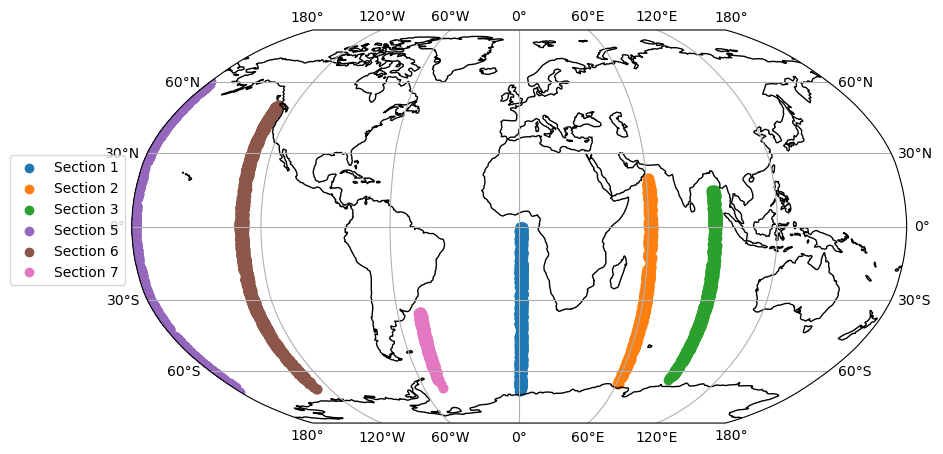

In [107]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
#for n in range(0,len(boxes)):
#    ax.plot(posttobox(boxes[n][:2],boxes[n][2:])[0],postobox(boxes[n][:2],boxes[n][2:][1], #color=colors[n],transform=ccrs.PlateCCarree(),lw=2)

ax.scatter(sect1.LONGITUDE,sect1.LATITUDE,transform=ccrs.PlateCarree(),color=colors[0],label='Section 1')
ax.scatter(sect2.LONGITUDE,sect2.LATITUDE,transform=ccrs.PlateCarree(),color=colors[1],label='Section 2')
ax.scatter(sect3.LONGITUDE,sect3.LATITUDE,transform=ccrs.PlateCarree(),color=colors[2],label='Section 3')
#ax.scatter(sect4.LONGITUDE,sect4.LATITUDE,transform=ccrs.PlateCarree(),color=colors[3],label='Section 4')
ax.scatter(sect5.LONGITUDE,sect5.LATITUDE,transform=ccrs.PlateCarree(),color=colors[4],label='Section 5')
ax.scatter(sect6.LONGITUDE,sect6.LATITUDE,transform=ccrs.PlateCarree(),color=colors[5],label='Section 6')
ax.scatter(sect7.LONGITUDE,sect7.LATITUDE,transform=ccrs.PlateCarree(),color=colors[6],label='Section 7')
#plt.scatter(sect8.LONGITUDE,sect8.LATITUDE,ax=ax,transform=ccrs.PlateCarree(),color=colors[7],label='Section 8')

plt.legend(bbox_to_anchor=(0,0.7))

NEED TO LOAD SECTIONS 4 AND 8

# Discrete T, S, SIG0 Sections

# EKE Sections